In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from fpdf import FPDF

In [57]:
def fetch_data(ticker, start="2023-09-01", end="2024-03-01"):
    data = yf.download(ticker, start=start, end=end)["Close"]
    df = data.to_frame(name="Close")
    return df

In [58]:
def add_moving_averages(df):
    df["SMA_20"] = df["Close"].rolling(window=20).mean()
    df["SMA_50"] = df["Close"].rolling(window=50).mean()
    df["EMA_20"] = df["Close"].ewm(span=20, adjust=False).mean()
    return df

def calculate_stats(df):
    df["Daily_Return"] = df["Close"].pct_change()
    stats = {
        "volatility": df["Daily_Return"].std() * np.sqrt(252),
        "skewness": skew(df["Daily_Return"].dropna()),
        "kurtosis": kurtosis(df["Daily_Return"].dropna())
    }
    return stats


In [59]:
def plot_price_with_indicators(df, ticker):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["Close"], label="Close Price", color="blue")
    if "SMA_20" in df:
        plt.plot(df.index, df["SMA_20"], label="SMA 20", linestyle="--", color="red")
    if "EMA_20" in df:
        plt.plot(df.index, df["EMA_20"], label="EMA 20", linestyle="--", color="purple")
    plt.title(f"{ticker} Stock with Indicators")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plot_path = f"{ticker}_plot.png"
    plt.savefig(plot_path)
    plt.show()
    return plot_path


In [60]:
class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, "Equity Research Report", ln=True, align="C")
        self.ln(10)

    def add_text(self, text):
        self.set_font("Arial", size=12)
        self.multi_cell(0, 10, text)

    def add_image(self, img_path):
        self.image(img_path, w=180)

def generate_pdf_report(ticker, stats, plot_path):
    pdf = PDFReport()
    pdf.add_page()
    summary = f"{ticker} - Volatility: {stats['volatility']:.2%}, Skewness: {stats['skewness']:.2f}, Kurtosis: {stats['kurtosis']:.2f}"
    pdf.add_text(summary)
    pdf.add_image(plot_path)
    output_path = f"{ticker}_report.pdf"
    pdf.output(output_path)
    return output_path


In [61]:
def run_report(ticker):
    df = fetch_data(ticker)
    df = add_moving_averages(df)
    stats = calculate_stats(df)
    plot_path = plot_price_with_indicators(df, ticker)
    pdf_path = generate_pdf_report(ticker, stats, plot_path)
    print(f"PDF report generated: {pdf_path}")


In [64]:
def fetch_data(ticker, start="2023-09-01", end="2024-03-01"):
    df = yf.download(ticker, start=start, end=end)[["Close"]]
    return df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21264\1915450375.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)[["Close"]]
[*********************100%***********************]  1 of 1 completed


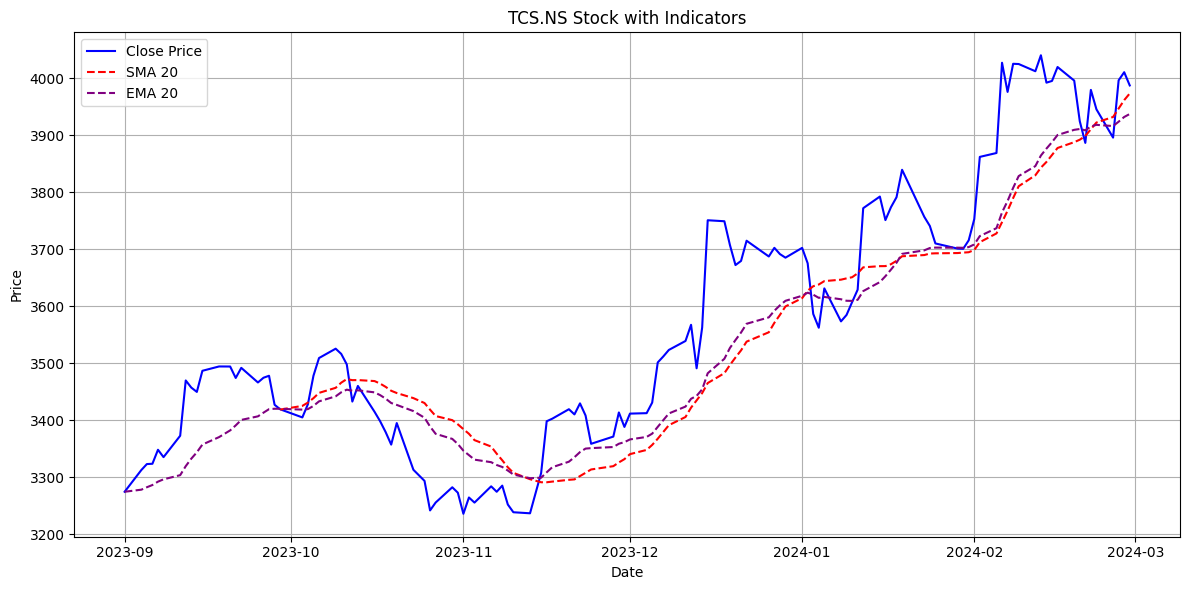

PDF report generated: TCS.NS_report.pdf


In [65]:
run_report("TCS.NS")